<font size="5"><center> **Exercise 1.2** </center></font>
<font size="4"><center> CS-673 <br> Introduction to Deep Generative Models </center></font>
<font size="4"><center> Sifakis Emmanouil, *1288* </center></font>

---

↓ Imports ↓

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seed = 198
np.random.seed(seed)

⇒ Question c

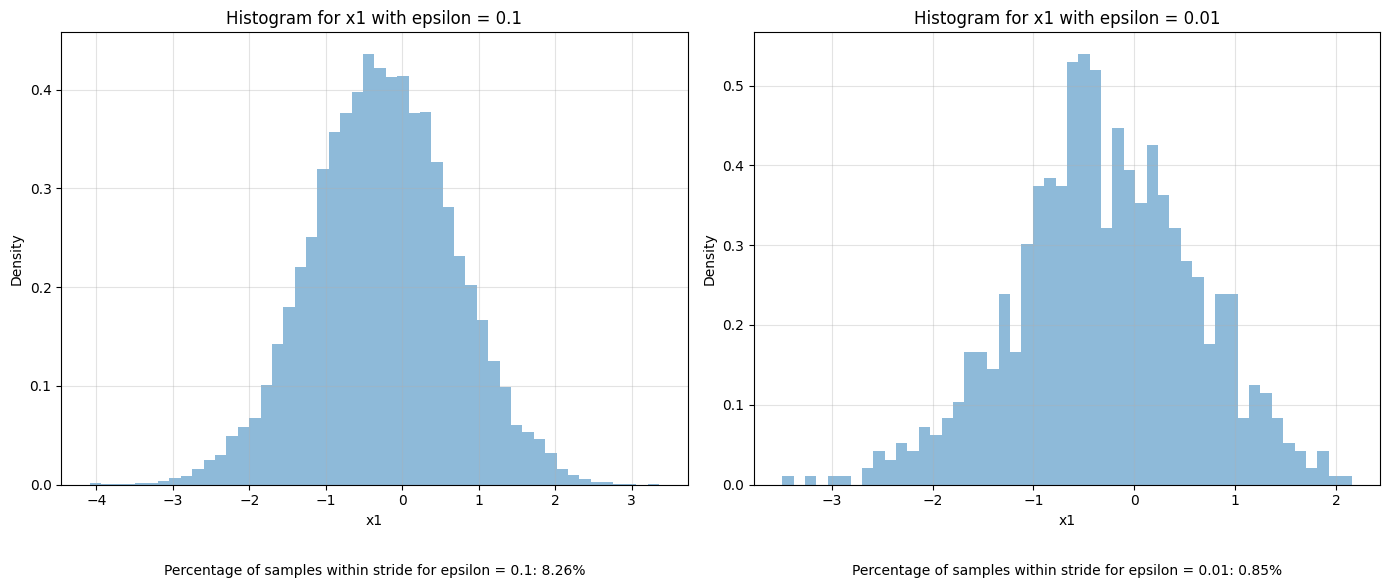

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mu = np.array([0, 1, -1.5])
Sigma = np.array([[1, 0.5, -0.8],
                  [0.5, 0.9, -0.7],
                  [-0.8, -0.7, 1.1]])
n = 10**5
epsilons = [0.1, 0.01]

# Analytical expression for theoretical PDF values for x1 within the stride
def theoretical_pdf_x1_given_x2x3(x, mu_1, mu_2, mu_3, sigma_22_23_33):
    normalization = 1 / np.sqrt(2 * np.pi * sigma_22_23_33)
    exponent = -0.5 * ((x - (mu_2 + mu_3)) ** 2) / sigma_22_23_33
    return normalization * np.exp(exponent)

# Generate samples from multivariate normal distribution
samples = np.random.multivariate_normal(mu, Sigma, n)

# Subplots
fig, axs = plt.subplots(1, len(epsilons), figsize=(14, 6))

for i, epsilon in enumerate(epsilons):
    # Define stride condition, and valid samples
    stride_condition = np.abs(samples[:, 1] + samples[:, 2]) < epsilon
    samples_within_stride = samples[stride_condition]

    # Calculate histogram for x1 using samples within the stride
    hist, bins = np.histogram(samples_within_stride[:, 0], bins=50, density=True)

    # Plot histogram
    axs[i].hist(samples_within_stride[:, 0], bins=50, density=True, alpha=0.5)
    axs[i].set_title(f'Histogram for x1 with epsilon = {epsilon}')
    axs[i].set_xlabel('x1')
    axs[i].set_ylabel('Density')

    # Plot theoretical PDF
    x_values = np.linspace(min(samples_within_stride[:, 0]), max(samples_within_stride[:, 0]), 100)
    theoretical_pdf_values = theoretical_pdf_x1_given_x2x3(x_values, mu[0], mu[1], mu[2], Sigma[1, 1] + 2 * Sigma[1, 2] + Sigma[2, 2])
    # axs[i].plot(x_values, theoretical_pdf_values, 'r-', linewidth=1.5, alpha=0.45) #### it seems shifted in relation to histogram so i did not include it
    axs[i].grid(alpha = 0.35)

    # Calculate the percentage of samples that fall within the stride
    percentage_within_stride = len(samples_within_stride) / n * 100
    axs[i].text(0.5, -0.2, f'Percentage of samples within stride for epsilon = {epsilon}: {percentage_within_stride:.2f}%', ha='center', transform=axs[i].transAxes)

plt.tight_layout()
plt.show()
